In [1]:
import const
from helper import *

import numpy as np
import matplotlib.pyplot as plt
from sim import Init, Grid

import astropy.units as u

### Set up physical units

In [12]:
Nside     = 256
boxsize   = 1
Ndot      = 1e10
c_red     = const.c
time_sim  = 5.2e-11

In [13]:
unit = SimpleNamespace(
    length = boxsize,
    time   = 1.,
    phot   = 1
)
unit.vel = unit.length/unit.time

### Set up the simulation

In [14]:
grid = Grid(N=Nside, C=0.4, bc_typ=[NEU, NEU], do_hydro=False, c_red=c_red/unit.vel)

with Init(grid) as grid:
    grid.urad[NPHOT] = 1e-13

In [15]:
for i in range(100):
    
    grid.inject([0.5, 0.5], Ndot/(grid.dx)**2)
    ### fluid + radiation 
    grid.step()

In [16]:
print(Ndot/(grid.dx)**2*grid.dt)

34.15696334829077


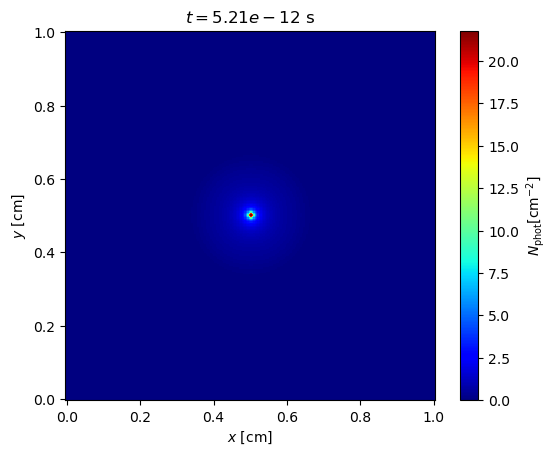

In [18]:
plt.pcolormesh(grid.x*unit.length, grid.y*unit.length, grid.urad[NPHOT], 
               cmap='jet')
plt.gca().set_aspect(True)
cbar = plt.colorbar()

plt.title(r'$t = %.3g~{\rm s}$' % (grid.t*unit.time))
plt.xlabel(r'$x$ [${\rm cm}$]')
plt.ylabel(r'$y$ [${\rm cm}$]')
cbar.set_label(r'$N_{\rm phot} [\rm cm ^{-2}]$')